In [3]:
import numpy as np
import pandas as pd
import os
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# SAMPLE_RATE = 44100
SAMPLE_RATE = 22050
# SAMPLE_RATE = 16000

# 데이터

In [1]:
wav_dict = {
            '아니요' : 0,
            '네' : 1,
            '소음' : 2
            }

In [4]:
wav_files = []

for file in os.listdir(f'./record_yes_no_2/'):
    wav_files.append(f'./record_yes_no_2/{file}')
    
wav_df = pd.DataFrame({'path': wav_files})
wav_df['label'] = wav_df['path'].apply(lambda x: x.split('/')[-1])
# wav_df['label'] = wav_df['label'].apply(lambda x: x.split('.')[0])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('_')[0])

wav_df

,path,label
0,./record_yes_no_2/네_2.wav,네
1,./record_yes_no_2/네_9.wav,네
2,./record_yes_no_2/아니요_21.wav,아니요
3,./record_yes_no_2/아니요_32.wav,아니요
4,./record_yes_no_2/네_32.wav,네
...,...,...
146,./record_yes_no_2/네_8.wav,네
147,./record_yes_no_2/아니요_18.wav,아니요
148,./record_yes_no_2/소음_42.wav,소음
149,./record_yes_no_2/네_49.wav,네


In [5]:
class_label = []

for label in wav_df['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
        
wav_df['class_label'] = class_label
wav_df

,path,label,class_label
0,./record_yes_no_2/네_2.wav,네,1
1,./record_yes_no_2/네_9.wav,네,1
2,./record_yes_no_2/아니요_21.wav,아니요,0
3,./record_yes_no_2/아니요_32.wav,아니요,0
4,./record_yes_no_2/네_32.wav,네,1
...,...,...,...
146,./record_yes_no_2/네_8.wav,네,1
147,./record_yes_no_2/아니요_18.wav,아니요,0
148,./record_yes_no_2/소음_42.wav,소음,2
149,./record_yes_no_2/네_49.wav,네,1


In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(wav_df,
                                        test_size=0.1,
                                        stratify=wav_df['class_label'],
                                        random_state=7)

In [7]:
train_data, val_data = train_test_split(train_data,
                                        test_size=0.2,
                                        stratify=train_data['class_label'],
                                        random_state=7)

In [8]:
len(train_data), len(val_data), len(test_data)

(108, 27, 16)

In [9]:
X_train = train_data['path']
y_train = train_data['class_label']

In [10]:
X_val = val_data['path']
y_val = val_data['class_label']

In [11]:
X_test = test_data['path']
y_test = test_data['class_label']

In [12]:
def get_mfcc(path):
    b, _ = librosa.core.load(path, sr = SAMPLE_RATE)
    assert _ == SAMPLE_RATE
    try:
        gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
        return pd.Series(np.hstack((np.mean(gmm, axis=1), np.std(gmm, axis=1))))
    except:
        print('bad file')
        return pd.Series([0]*40)

In [13]:
features_train = []

for i, wav in enumerate(X_train):
    mfccs = get_mfcc(wav)
    features_train.append([mfccs, y_train.values[i]])#, y_train[i]])

features_df = pd.DataFrame(features_train, columns=['feature', 'class_label'])

/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05  3.3569336e-04 ...  1.7730713e-02
  1.4923096e-02  1.7303467e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  1.2207031e-04 ...  5.9387207e-02
  5.7006836e-02  5.2734375e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -6.1035156e-05 ... -4.6691895e-03
 -3.0517578e-03 -1.1901855e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pa

In [14]:
features_df

,feature,class_label
0,0 -204.299255 1 133.623581 2 16.19...,1
1,0 -248.508545 1 160.364380 2 -6.79...,0
2,0 -345.672760 1 136.353470 2 8.17...,2
3,0 -386.658112 1 145.215042 2 10.82...,2
4,0 -259.770294 1 144.230820 2 2.50...,0
...,...,...
103,0 -289.399109 1 162.614990 2 -2.09...,0
104,0 -391.965332 1 138.679245 2 16.46...,2
105,0 -392.539032 1 138.675766 2 23.16...,2
106,0 -384.775665 1 135.679855 2 9.17...,1


In [15]:
features_val = []

for i, wav in enumerate(X_val):
    mfccs = get_mfcc(wav)
    features_val.append([mfccs, y_val.values[i]])#, y_val[i]])

features_val_df = pd.DataFrame(features_val, columns=['feature', 'class_label'])

/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  1.2207031e-04 ...  9.0026855e-03
  1.0406494e-02  1.0681152e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00714111 -0.01071167
 -0.01559448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.006073   -0.00741577
 -0.00311279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 

In [16]:
features_val_df

,feature,class_label
0,0 -357.139954 1 147.641281 2 26.42...,2
1,0 -331.036530 1 154.555176 2 9.39...,2
2,0 -260.464752 1 154.753967 2 -5.39...,0
3,0 -318.857819 1 162.821228 2 -4.55...,0
4,0 -399.756683 1 138.245712 2 15.87...,2
5,0 -174.487350 1 170.436432 2 -8.26...,0
6,0 -364.027069 1 149.187195 2 -0.58...,2
7,0 -370.093262 1 135.802200 2 4.28...,1
8,0 -355.534393 1 130.232391 2 4.22...,1
9,0 -385.033844 1 125.192711 2 9.27...,1


In [17]:
features_test = []

for i, wav in enumerate(X_test):
    mfccs = get_mfcc(wav)
    features_test.append([mfccs, y_test.values[i]])#, y_val[i]])

features_test_df = pd.DataFrame(features_test, columns=['feature', 'class_label'])

/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  3.0517578e-05 ... -2.2613525e-02
 -2.1972656e-02 -2.1514893e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 3.05175781e-05  6.10351562e-05 -3.35693359e-04 ...  1.01623535e-02
  8.02612305e-03  1.02844238e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_10566/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  1.8310547e-04 ...  5.6671143e-02
  5.5297852e-02  5.5694580e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_10566/1176896864.py:5: FutureWarni

In [18]:
features_test_df

,feature,class_label
0,0 -239.917313 1 155.863007 2 1.90...,0
1,0 -203.135498 1 164.028885 2 -2.78...,0
2,0 -201.746964 1 145.008102 2 -11.33...,0
3,0 -409.068634 1 133.826187 2 15.78...,2
4,0 -156.712784 1 153.253616 2 -11.27...,0
5,0 -337.435516 1 142.885101 2 9.36...,2
6,0 -315.865204 1 137.930603 2 3.26...,2
7,0 -396.006317 1 141.530685 2 -1.13...,1
8,0 -360.865021 1 147.181610 2 9.34...,2
9,0 -240.432800 1 139.907730 2 0.16...,1


In [19]:
X_train = np.array(features_df.feature.tolist())
y_train = np.array(features_df.class_label.tolist())

In [20]:
X_train.shape

(108, 80)

In [21]:
X_val = np.array(features_val_df.feature.tolist())
y_val = np.array(features_val_df.class_label.tolist())

In [22]:
X_val.shape

(27, 80)

In [23]:
X_test = np.array(features_test_df.feature.tolist())
y_test = np.array(features_test_df.class_label.tolist())

In [24]:
X_test.shape

(16, 80)

# 모델

In [25]:
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#fitting RandomForest on the dataset
rfc = RandomForestClassifier(n_estimators = 150)
rfc.fit(X_train, y_train)

#checking the accuracy of the model
print(rfc.score(X_test, y_test))

1.0


In [26]:
predicted = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'accuracy score: {accuracy:.3}')

accuracy score: 1.0


In [27]:
rfc.predict_proba(X_test)

array([[0.9       , 0.09333333, 0.00666667],
       [0.81333333, 0.12666667, 0.06      ],
       [0.82      , 0.16666667, 0.01333333],
       [0.        , 0.        , 1.        ],
       [0.90666667, 0.04666667, 0.04666667],
       [0.00666667, 0.08666667, 0.90666667],
       [0.07333333, 0.24666667, 0.68      ],
       [0.09333333, 0.74666667, 0.16      ],
       [0.16      , 0.08666667, 0.75333333],
       [0.05333333, 0.87333333, 0.07333333],
       [0.13333333, 0.72      , 0.14666667],
       [0.12666667, 0.84666667, 0.02666667],
       [0.02      , 0.05333333, 0.92666667],
       [0.35333333, 0.56      , 0.08666667],
       [0.01333333, 0.90666667, 0.08      ],
       [0.77333333, 0.18666667, 0.04      ]])

<AxesSubplot: >

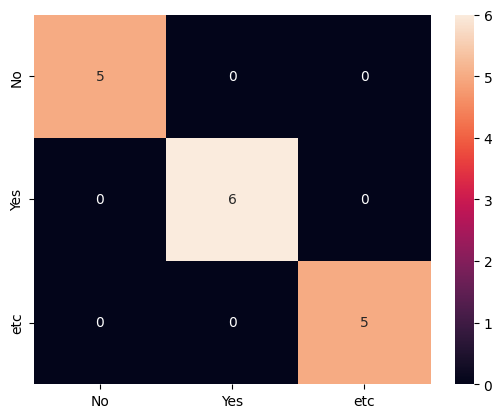

In [29]:
# cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=wav_dict.keys(), index=wav_dict.keys())
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['No', 'Yes', 'etc'], index=['No', 'Yes', 'etc'])
sns.heatmap(cm, annot=True)

In [30]:
# GradientBoostingClassifier 

# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#                         max_depth=5, random_state=0).fit(X_train, y_train)

# XGBClassifier
clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3).fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [52]:
# # Model Save
# import pickle

# filename = './xgb_model_with_noise.model'

# # model save
# pickle.dump(clf, open(filename, 'wb'))

# # model load
# xgb_model = pickle.load(open(filename, 'rb'))

<AxesSubplot: >

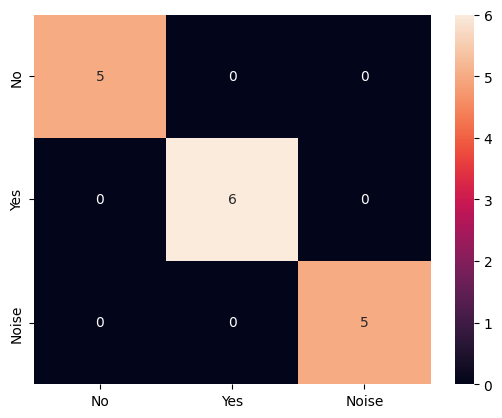

In [31]:
predicted = clf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['No', 'Yes', 'Noise'], index=['No', 'Yes', 'Noise'])
sns.heatmap(cm, annot=True)

In [32]:
clf.predict_proba(X_test)

array([[0.98762053, 0.00955754, 0.00282186],
       [0.99088997, 0.00455558, 0.00455442],
       [0.9893106 , 0.00506824, 0.00562114],
       [0.00254354, 0.00283744, 0.994619  ],
       [0.98769   , 0.00433166, 0.00797836],
       [0.00435021, 0.00667984, 0.9889699 ],
       [0.0090165 , 0.00894208, 0.9820415 ],
       [0.00380966, 0.9897878 , 0.00640258],
       [0.0092505 , 0.00231061, 0.9884389 ],
       [0.00585826, 0.9909163 , 0.00322543],
       [0.0180434 , 0.9742886 , 0.00766804],
       [0.00645235, 0.9872433 , 0.00630444],
       [0.00265902, 0.00559226, 0.9917487 ],
       [0.11385991, 0.7920708 , 0.09406925],
       [0.00716054, 0.98281384, 0.01002561],
       [0.89212865, 0.10146651, 0.0064049 ]], dtype=float32)

# 음성인식

In [33]:
reverse_dict= dict(map(reversed, wav_dict.items()))

In [34]:
reverse_dict

{0: '아니요', 1: '네', 2: '소음'}

In [99]:
import librosa
import sounddevice as sd
import numpy as np

# Collect microphone audio for 5 seconds
fs = SAMPLE_RATE  # Sample rate
duration = 2  # Seconds
recording = sd.rec(int(fs * duration), samplerate=fs, channels=1)
sd.wait()
print('recording...')
recording = recording.flatten()
print(recording.shape)


# Extract MFCCs from microphone recording
listen = []
gmm = librosa.feature.mfcc(recording, sr = SAMPLE_RATE, n_mfcc=40)
mfccs =  pd.Series(np.hstack((np.mean(gmm, axis=1), np.std(gmm, axis=1))))
listen.append([mfccs])
listen_df = pd.DataFrame(listen, columns=['feature'])

X_listen = np.array(listen_df.feature.tolist())
print(X_listen.shape)


# Use MFCCs as input to your models
# prediction = rfc.predict_proba(X_listen)   # RandomForest
prediction = clf.predict_proba(X_listen)  # XGBoost

print(prediction)
print(reverse_dict[np.argmax(prediction)])


recording...
(44100,)
(1, 80)
[[0.8126066  0.18739343]]
아니요


/tmp/ipykernel_21775/2493600234.py:27: FutureWarning: Pass y=[ 2.3391069e-05  9.4646515e-05 -4.7886034e-04 ...  2.4402734e-02
  2.6031600e-02  2.5488850e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(recording, sr = SAMPLE_RATE, n_fft=512, n_mfcc=40)


## pyaudio

In [101]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050 #SAMPLE_RATE

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("start recording...")

frames = []
seconds = 5

for i in range(0, int(RATE / CHUNK*seconds)):
    data = stream.read(CHUNK)
    frames.append(data)

print('recording stopped')

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("./output.wav", "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

listen = []
mfccs = get_mfcc("./output.wav")
listen.append([mfccs])
listen_df = pd.DataFrame(listen, columns=['feature'])

X_listen = np.array(listen_df.feature.tolist())
print(X_listen.shape)



# # Use MFCCs as input to your rfc model
# prediction = rfc.predict_proba(X_listen)
prediction = clf.predict_proba(X_listen)
print(prediction)
print(reverse_dict[np.argmax(prediction)])

start recording...
recording stopped
(1, 80)
[[0.8126066  0.18739343]]
아니요


/tmp/ipykernel_21775/3405466197.py:49: FutureWarning: Pass y=[ 2.3391069e-05  9.4646515e-05 -4.7886034e-04 ...  2.4402734e-02
  2.6031600e-02  2.5488850e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(recording, sr = SAMPLE_RATE, n_fft=512, n_mfcc=40)


## window로 밀면서 음성인식

In [54]:
import pyaudio
import wave
import librosa
import pickle
from xgboost import XGBClassifier

wav_dict = {'아니요' : 0,
            '네' : 1,
            '소음' : 2}
reverse_dict = dict(map(reversed, wav_dict.items()))

# # model load
# filename = './xgb_model.model'
# xgb_model = pickle.load(open(filename, 'rb'))

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050 #SAMPLE_RATE

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("start recording...")

frames = []
seconds = 3

for i in range(0, int(RATE / CHUNK*seconds)):
    data = stream.read(CHUNK)
    frames.append(data)

print('recording stopped')

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("./output.wav", "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

# Load the audio file
audio, sr = librosa.load("./output.wav")

# Define the window size and step size (in seconds)
window_size = 1.0
step_size = 0.3

# Convert window size and step size to samples
window_size_samples = int(window_size * sr)
step_size_samples = int(step_size * sr)

# Initialize an empty list to store the MFCCs
mfccs = []

# Iterate over the audio using the sliding window
for i in range(0, len(audio) - window_size_samples, step_size_samples):
    # Get the current window of audio
    window = audio[i:i+window_size_samples]

    # Compute the MFCCs for the window
    mfcc = librosa.feature.mfcc(y=window, sr=sr, n_mfcc=40)

    # Append the MFCCs to the list
    mfccs.append(mfcc)

# Convert the list of MFCCs to a numpy array
mfccs = np.array(mfccs)

count_no = 0
count_yes = 0

for mfcc in mfccs:
    listen = []
    mfcc =  pd.Series(np.hstack((np.mean(mfcc, axis=1), np.std(mfcc, axis=1))))
    listen.append([mfcc])
    listen_df = pd.DataFrame(listen, columns=['feature'])

    X_listen = np.array(listen_df.feature.tolist())
    
    # Use MFCCs as input to model
    # prediction = rfc.predict_proba(X_listen)
    prediction = clf.predict_proba(X_listen)
    yes_or_no = reverse_dict[np.argmax(prediction)]
    print(prediction)
    print(yes_or_no)
    if yes_or_no == '아니요':
        count_no += 1
    elif yes_or_no == '네':
        count_yes += 1

answer = '네'

if count_no > count_yes:
    answer = '아니요'
    print('결론 :', answer)
else:
    print('결론 :', answer)

ALSA lib pcm_dsnoop.c:641:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1089:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_oss.c:377:(_snd_pcm_oss_open) Unknown field port
ALSA lib pcm_oss.c:377:(_snd_pcm_oss_open) Unknown field port
ALSA lib pcm_usb_stream.c:486:(_snd_pcm_usb_stream_open) Invalid type for card
ALSA lib pcm_usb_stream.c:486:(_snd_pcm_usb_stream_open) Invalid type for card
ALSA lib pcm_dmix.c:1089:(snd_pcm_dmix_open) unable to open slave


start recording...
recording stopped
[[0.0040227  0.01816463 0.97781265]]
소음
[[0.0040258  0.01740842 0.97856575]]
소음
[[0.00415844 0.0132845  0.982557  ]]
소음
[[0.00404419 0.01291952 0.9830362 ]]
소음
[[0.0045104  0.01327981 0.9822098 ]]
소음
[[0.00480743 0.01290962 0.98228294]]
소음
[[0.00403797 0.01443842 0.9815236 ]]
소음
결론 : 네


In [46]:
import matplotlib.pyplot as plt
import librosa.display

def draw_sound(filename):
    plt.figure(figsize = (12, 4))
    data, librosa_sample_rate  = librosa.load(filename)
    plt.title('sound_bad_1.wav')
    librosa.display.waveshow(data, sr = librosa_sample_rate)

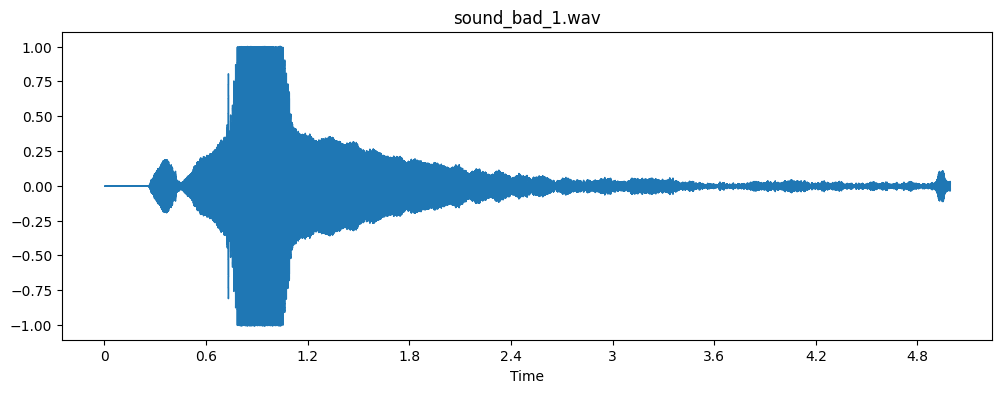

In [107]:
draw_sound('./output_yes.wav') #네

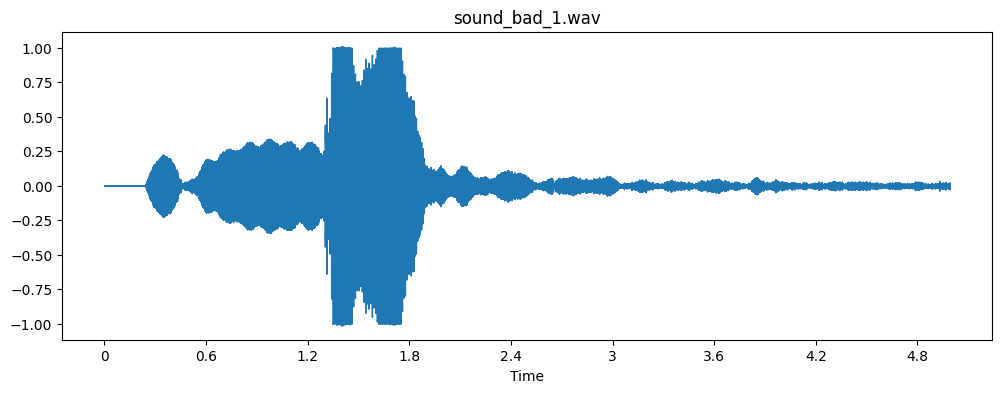

In [108]:
draw_sound('./output_no.wav') #아니요

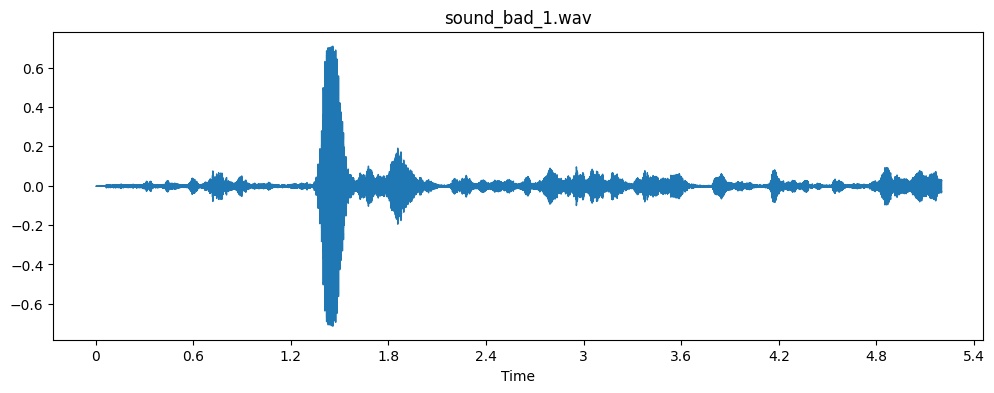

In [60]:
draw_sound('./record_yes_no/네_3.wav')

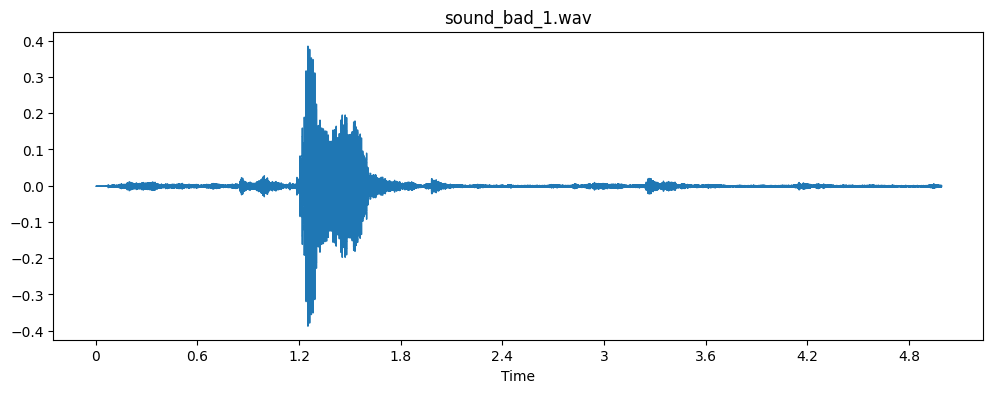

In [55]:
draw_sound('./record_yes_no/아니요_3.wav')

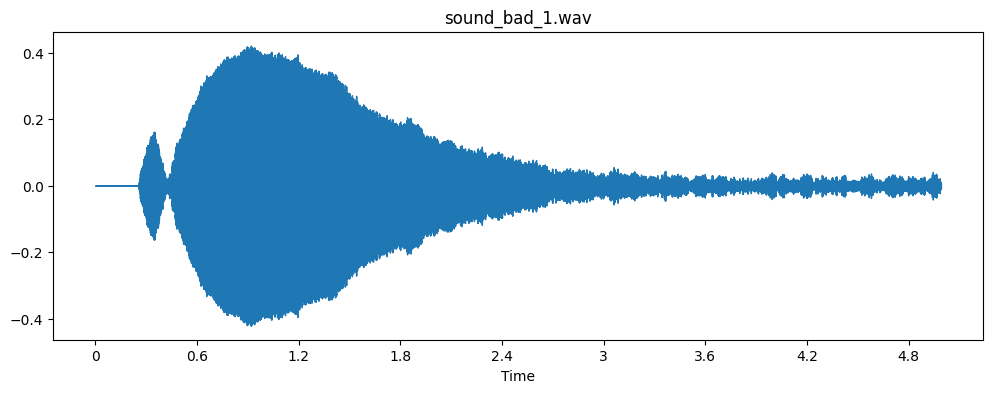

In [110]:
draw_sound('./output_nun.wav') #nun

In [111]:
# FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, title, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    
    
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    
    plt.figure(figsize=(15, 5))
    plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    plt.title(title)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('magnitude')
    
    plt.show()

In [126]:
import matplotlib as mpl
mpl.rc('font', family="NanumBarunGothic")

In [113]:
y, sr = librosa.load('./output_yes.wav')

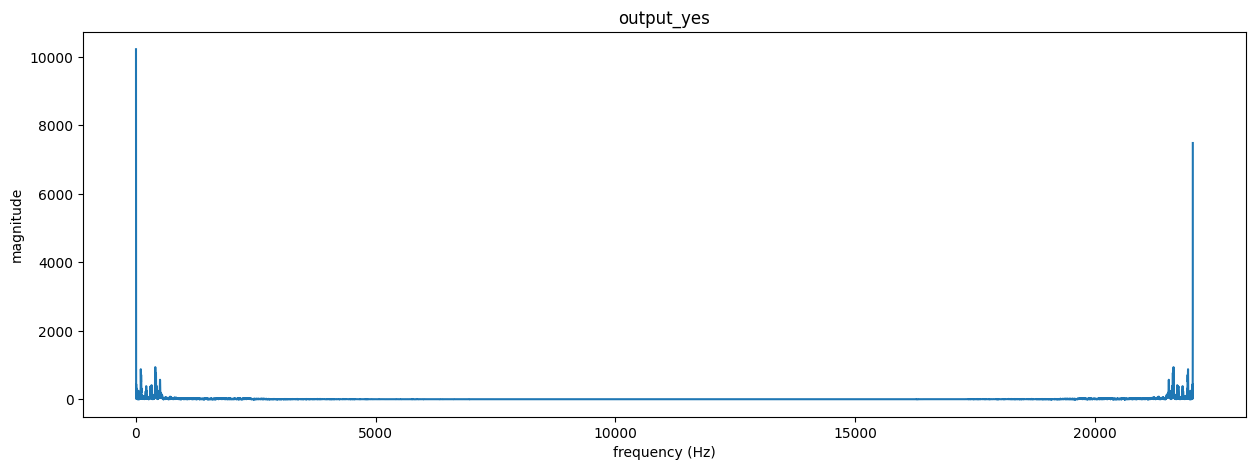

In [120]:
plot_magnitude_spectrum(y, "output_yes", sr, 1)
# 22,050Hz가 default 

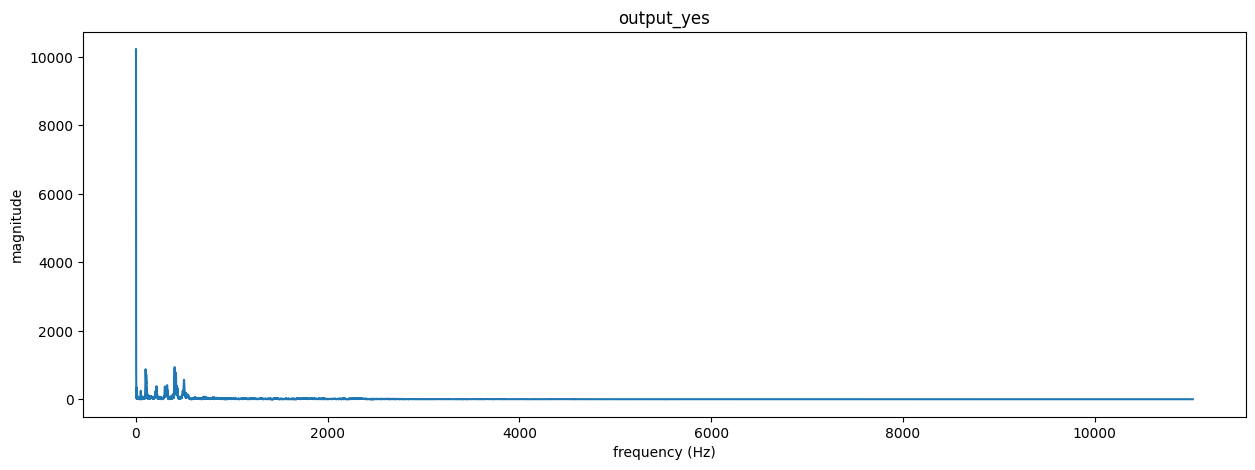

In [121]:
plot_magnitude_spectrum(y, "output_yes", sr, 0.5)
# 0.5값을 줘서 대칭되는 것 중 전면부만 사용

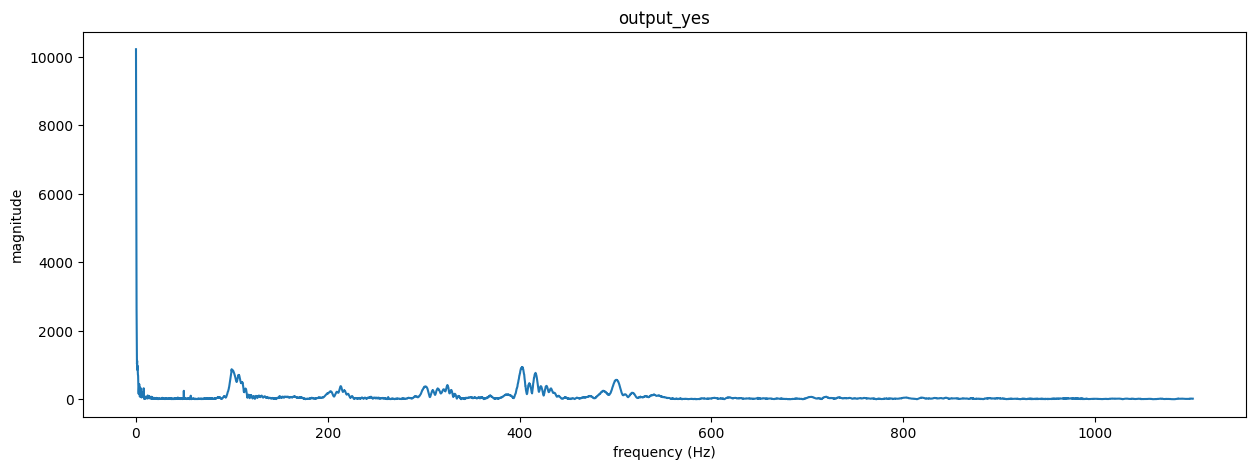

In [122]:
plot_magnitude_spectrum(y, "output_yes", sr, 0.05)
#유효한 스펙트럼까지 슬라이싱

In [117]:
y1, sr1 = librosa.load('./record_yes_no/네_1.wav')

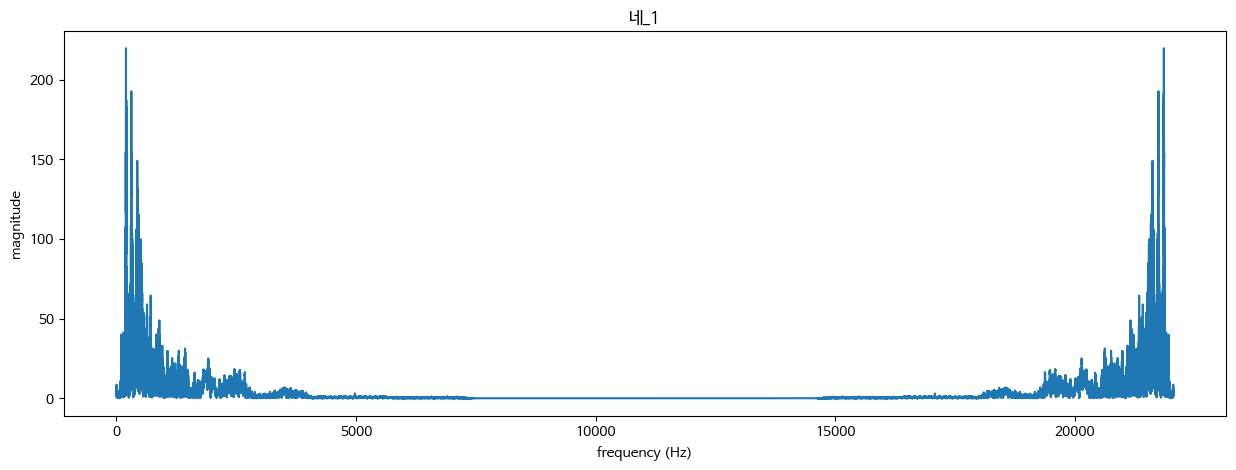

In [127]:
plot_magnitude_spectrum(y1, "네_1", sr1, 1)
# 22,050Hz가 default 

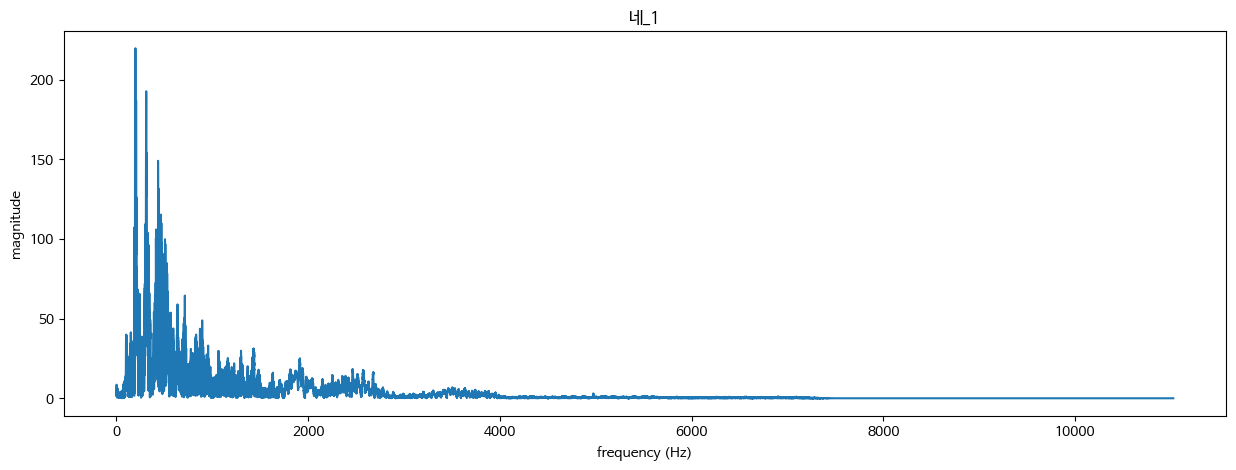

In [128]:
plot_magnitude_spectrum(y1, "네_1", sr1, 0.5)
# 0.5값을 줘서 대칭되는 것 중 전면부만 사용

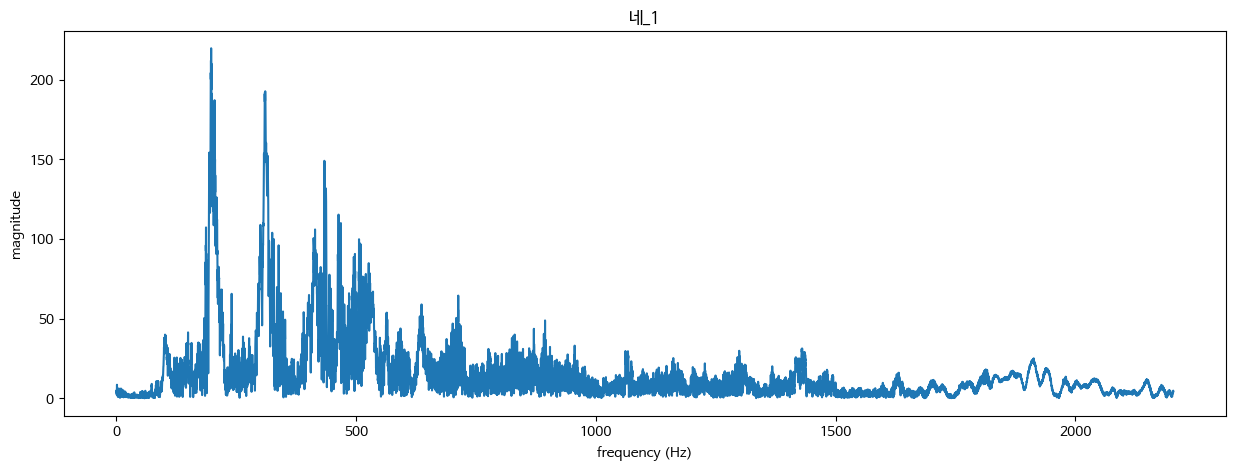

In [130]:
plot_magnitude_spectrum(y1, "네_1", sr1, 0.1)
#유효한 스펙트럼까지 슬라이싱